In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Kaustubh Vaibhav\Advance Analystics\Datasets\BUNDESBANK-BBK01_WT5511.csv")
df

Date    Value
0    30-04-1968    39.10
1    31-05-1968    42.00
2    30-06-1968    40.95
3    31-07-1968    38.90
4    31-08-1968    39.85
..          ...      ...
572  31-12-2015  1062.25
573  31-01-2016  1112.90
574  29-02-2016  1234.15
575  31-03-2016  1233.60
576  30-04-2016  1237.70

[577 rows x 2 columns]

In [3]:
# PArtitioning of data
y = df['Value']
y_train = df['Value'][:-12]
y_test = df['Value'][-12:]

In [4]:
print(y_test)

565    1190.40
566    1175.00
567    1080.05
568    1125.50
569    1122.50
570    1147.75
571    1055.65
572    1062.25
573    1112.90
574    1234.15
575    1233.60
576    1237.70
Name: Value, dtype: float64


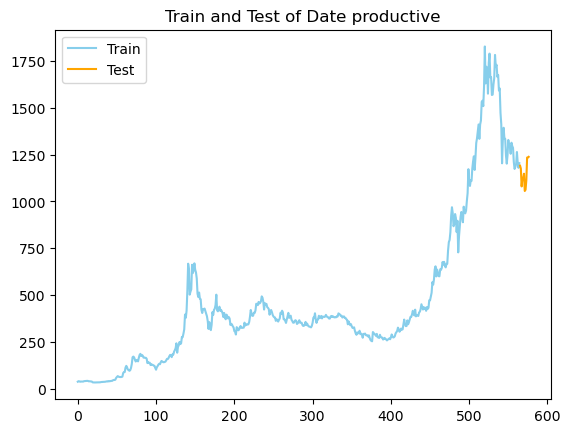

In [5]:
plt.plot(y_train, color = 'skyblue', label = 'Train')
plt.plot(y_test, color = 'orange', label = 'Test')
plt.legend(loc = 'best')
plt.title("Train and Test of Date productive")
plt.show()

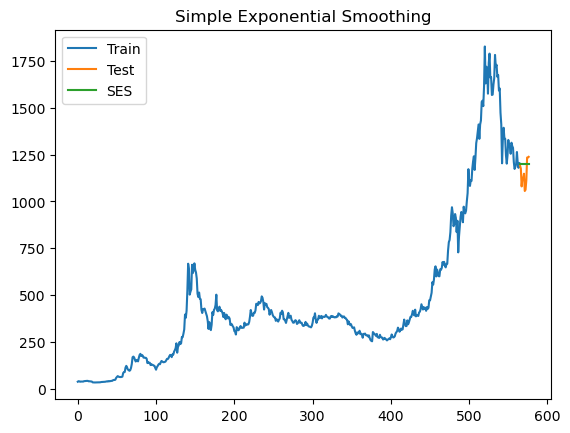

In [6]:
# Simple Exponential Smoothing
alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit()
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [7]:
# EVALUATING..
# lower rmse is preferred, as it signifies the error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  83.13336557372564


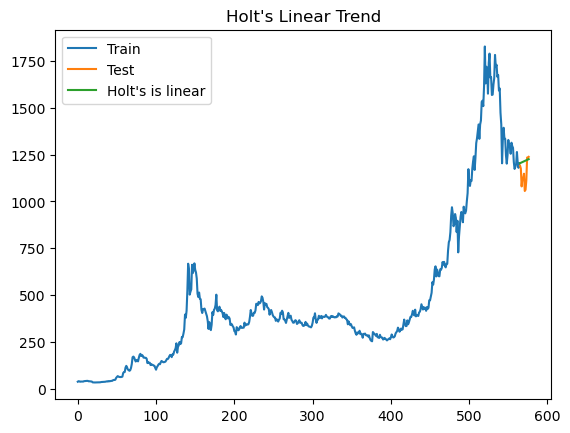

In [8]:
# Holt's Linear Trend
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Linear Trend")
plt.show()


In [9]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  90.59882898410596


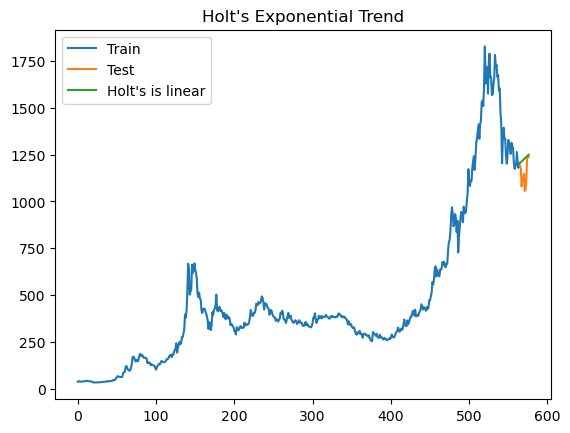

In [10]:
# Holt's Exponential trend
alpha = 0.1
beta = 0.8
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Exponential Trend")
plt.show()

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)


RMSE =  99.27531418345565


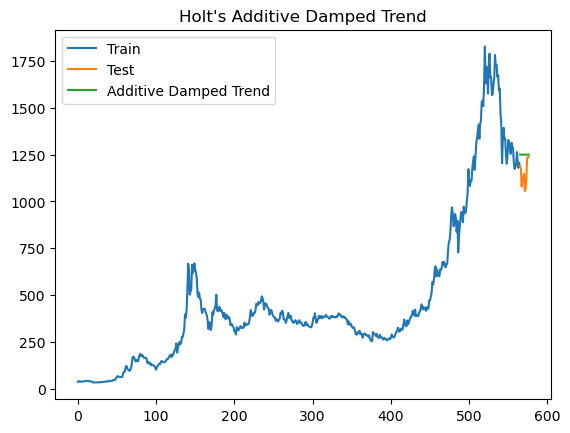

In [12]:
# Holt's Additive Trend
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Additive Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Additive Damped Trend")
plt.show()

In [13]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  119.5617743425012


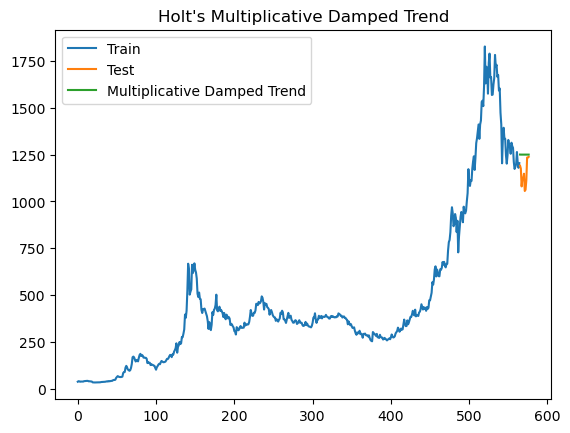

In [14]:
# Holt's Multiplicative Trend
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True,exponential=True).fit(smoothing_level=alpha,
                         smoothing_trend=beta,
                         damping_trend=phi)
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Multiplicative Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Multiplicative Damped Trend")
plt.show()

In [15]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE =",rmse)

RMSE = 119.67676081991081


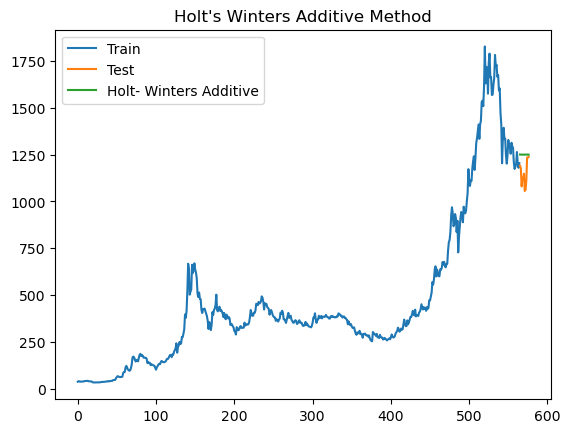

In [16]:
# Holt- Winters Additive
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt's Winters Additive Method")
plt.show()

In [17]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  99.5516411909041


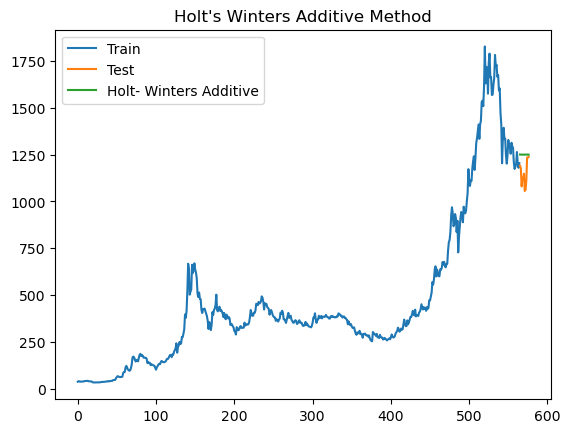

In [18]:
# Holt- Winters Multiplicative
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt's Winters Additive Method")
plt.show()

In [19]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  100.29559779183789


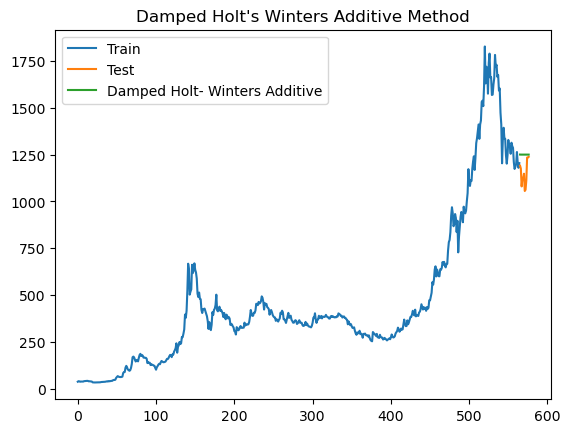

In [20]:
# Damped Holts Winters Multiplicative
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Damped Holt's Winters Additive Method")
plt.show()

In [21]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  79.06026530967877


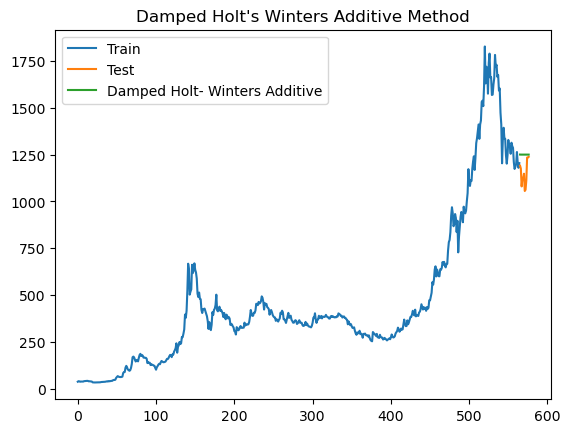

In [22]:
# Damped Holts Winters Multiplicative
alpha = 0.1
beta = 0.8
gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 12, damped_trend = True,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Damped Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Damped Holt's Winters Additive Method")
plt.show()

In [23]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  76.08641856902007
